## Sampling-based vs. Anytime Planners
In this notebook, we investigate the trade-off between sampling-based and anytime planners to compare the results from an anytime planner against the sampling-based planner in combination with a post-smoothing method. They could take approximately the same time and maybe it is beneficial to have a fast planner and an efficitive post-smoothing step vs. a single anytime planner.

In [142]:
%load_ext autoreload
%autoreload 2
import mpb
from mpb import MPB, MultipleMPB
from definitions import all_planners, sampling_planners, \
                        anytime_planners, sbpl_planners

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_template.json.
Created MPB from config ../bin/benchmark_templat


Benchmark 0 (sampling_rrt) finished successfully.

Benchmark 2 (sampling_sbl) finished successfully.

Benchmark 40 (anytime_bfmt_5) finished successfully.

Benchmark 46 (anytime_cforest_5) finished successfully.

Benchmark 52 (anytime_bit_star_5) finished successfully.

Benchmark 58 (anytime_spars_5) finished successfully.


Benchmark 8 (sampling_pdst) finished successfully.
Benchmark 64 (anytime_spars2_5) finished successfully.

Benchmark 16 (anytime_rrt_sharp_5) finished successfully.

Benchmark 28 (anytime_sorrt_star_5) finished successfully.

Benchmark 22 (anytime_informed_rrt_star_5) finished successfully.

Benchmark 10 (anytime_rrt_star_5) finished successfully.

Benchmark 42 (anytime_bfmt_15) finished successfully.

Benchmark 1 (sampling_est) finished successfully.

Benchmark 34 (anytime_prm_star_5) finished successfully.

Benchmark 44 (anytime_bfmt_45) finished successfully.

Benchmark 43 (anytime_bfmt_30) finished successfully.

Benchmark 41 (anytime_bfmt_10) finished success

True

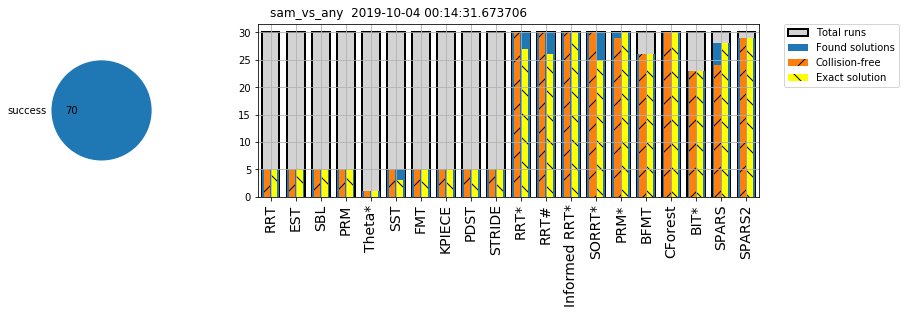

In [155]:
pool = MultipleMPB()
for planner in sampling_planners:
    m = MPB()
    m["max_planning_time"] = 50
    m.set_corridor_grid_env(width=150, height=150, branches=100, radius=5)
    m.set_planners([planner])
    m.set_steer_functions(['reeds_shepp'])
    m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
    m.set_id('sampling_%s' % planner)
    pool.benchmarks.append(m)    

for planner in anytime_planners:
    for max_time in [5, 10, 15, 30, 45, 60]:
        m = MPB()
        m.set_corridor_grid_env(width=150, height=150, branches=100, radius=5)
        m.set_planners([planner])
        m.set_steer_functions(['reeds_shepp'])
        m["max_planning_time"] = max_time
        m.set_smoothers(['grips', 'ompl_bspline', 'ompl_shortcut', 'ompl_simplify_max'])
        m.set_id('anytime_%s_%i' % (planner, max_time))
        pool.benchmarks.append(m)
pool.run_parallel('sam_vs_any', runs=5)

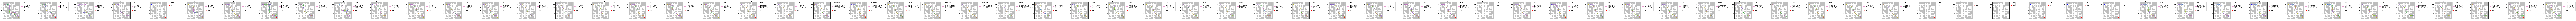

In [156]:
pool.visualize_trajectories(run_id='1', show_smoother=True, show_legend=True)

In [157]:
from copy import copy
from definitions import planner_names
plan_names = list(map(lambda p: planner_names[p], sampling_planners))
for planner in anytime_planners:
    for max_time in [5, 10, 15, 30, 45, 60]:
        plan_names.append("%s %02is" % (planner_names[planner], max_time))
MPB.merge(pool.benchmarks, "sampling_vs_anytime.json", plan_names=plan_names)

Successfully merged [sam_vs_any/sampling_rrt_results.json, sam_vs_any/sampling_est_results.json, sam_vs_any/sampling_sbl_results.json, sam_vs_any/sampling_prm_results.json, sam_vs_any/sampling_theta_star_results.json, sam_vs_any/sampling_sst_results.json, sam_vs_any/sampling_fmt_results.json, sam_vs_any/sampling_kpiece_results.json, sam_vs_any/sampling_pdst_results.json, sam_vs_any/sampling_stride_results.json, sam_vs_any/anytime_rrt_star_5_results.json, sam_vs_any/anytime_rrt_star_10_results.json, sam_vs_any/anytime_rrt_star_15_results.json, sam_vs_any/anytime_rrt_star_30_results.json, sam_vs_any/anytime_rrt_star_45_results.json, sam_vs_any/anytime_rrt_star_60_results.json, sam_vs_any/anytime_rrt_sharp_5_results.json, sam_vs_any/anytime_rrt_sharp_10_results.json, sam_vs_any/anytime_rrt_sharp_15_results.json, sam_vs_any/anytime_rrt_sharp_30_results.json, sam_vs_any/anytime_rrt_sharp_45_results.json, sam_vs_any/anytime_rrt_sharp_60_results.json, sam_vs_any/anytime_informed_rrt_star_5_re

Visualizing sampling_vs_anytime.json...
Saved sampling_vs_anytime_planners.pdf.


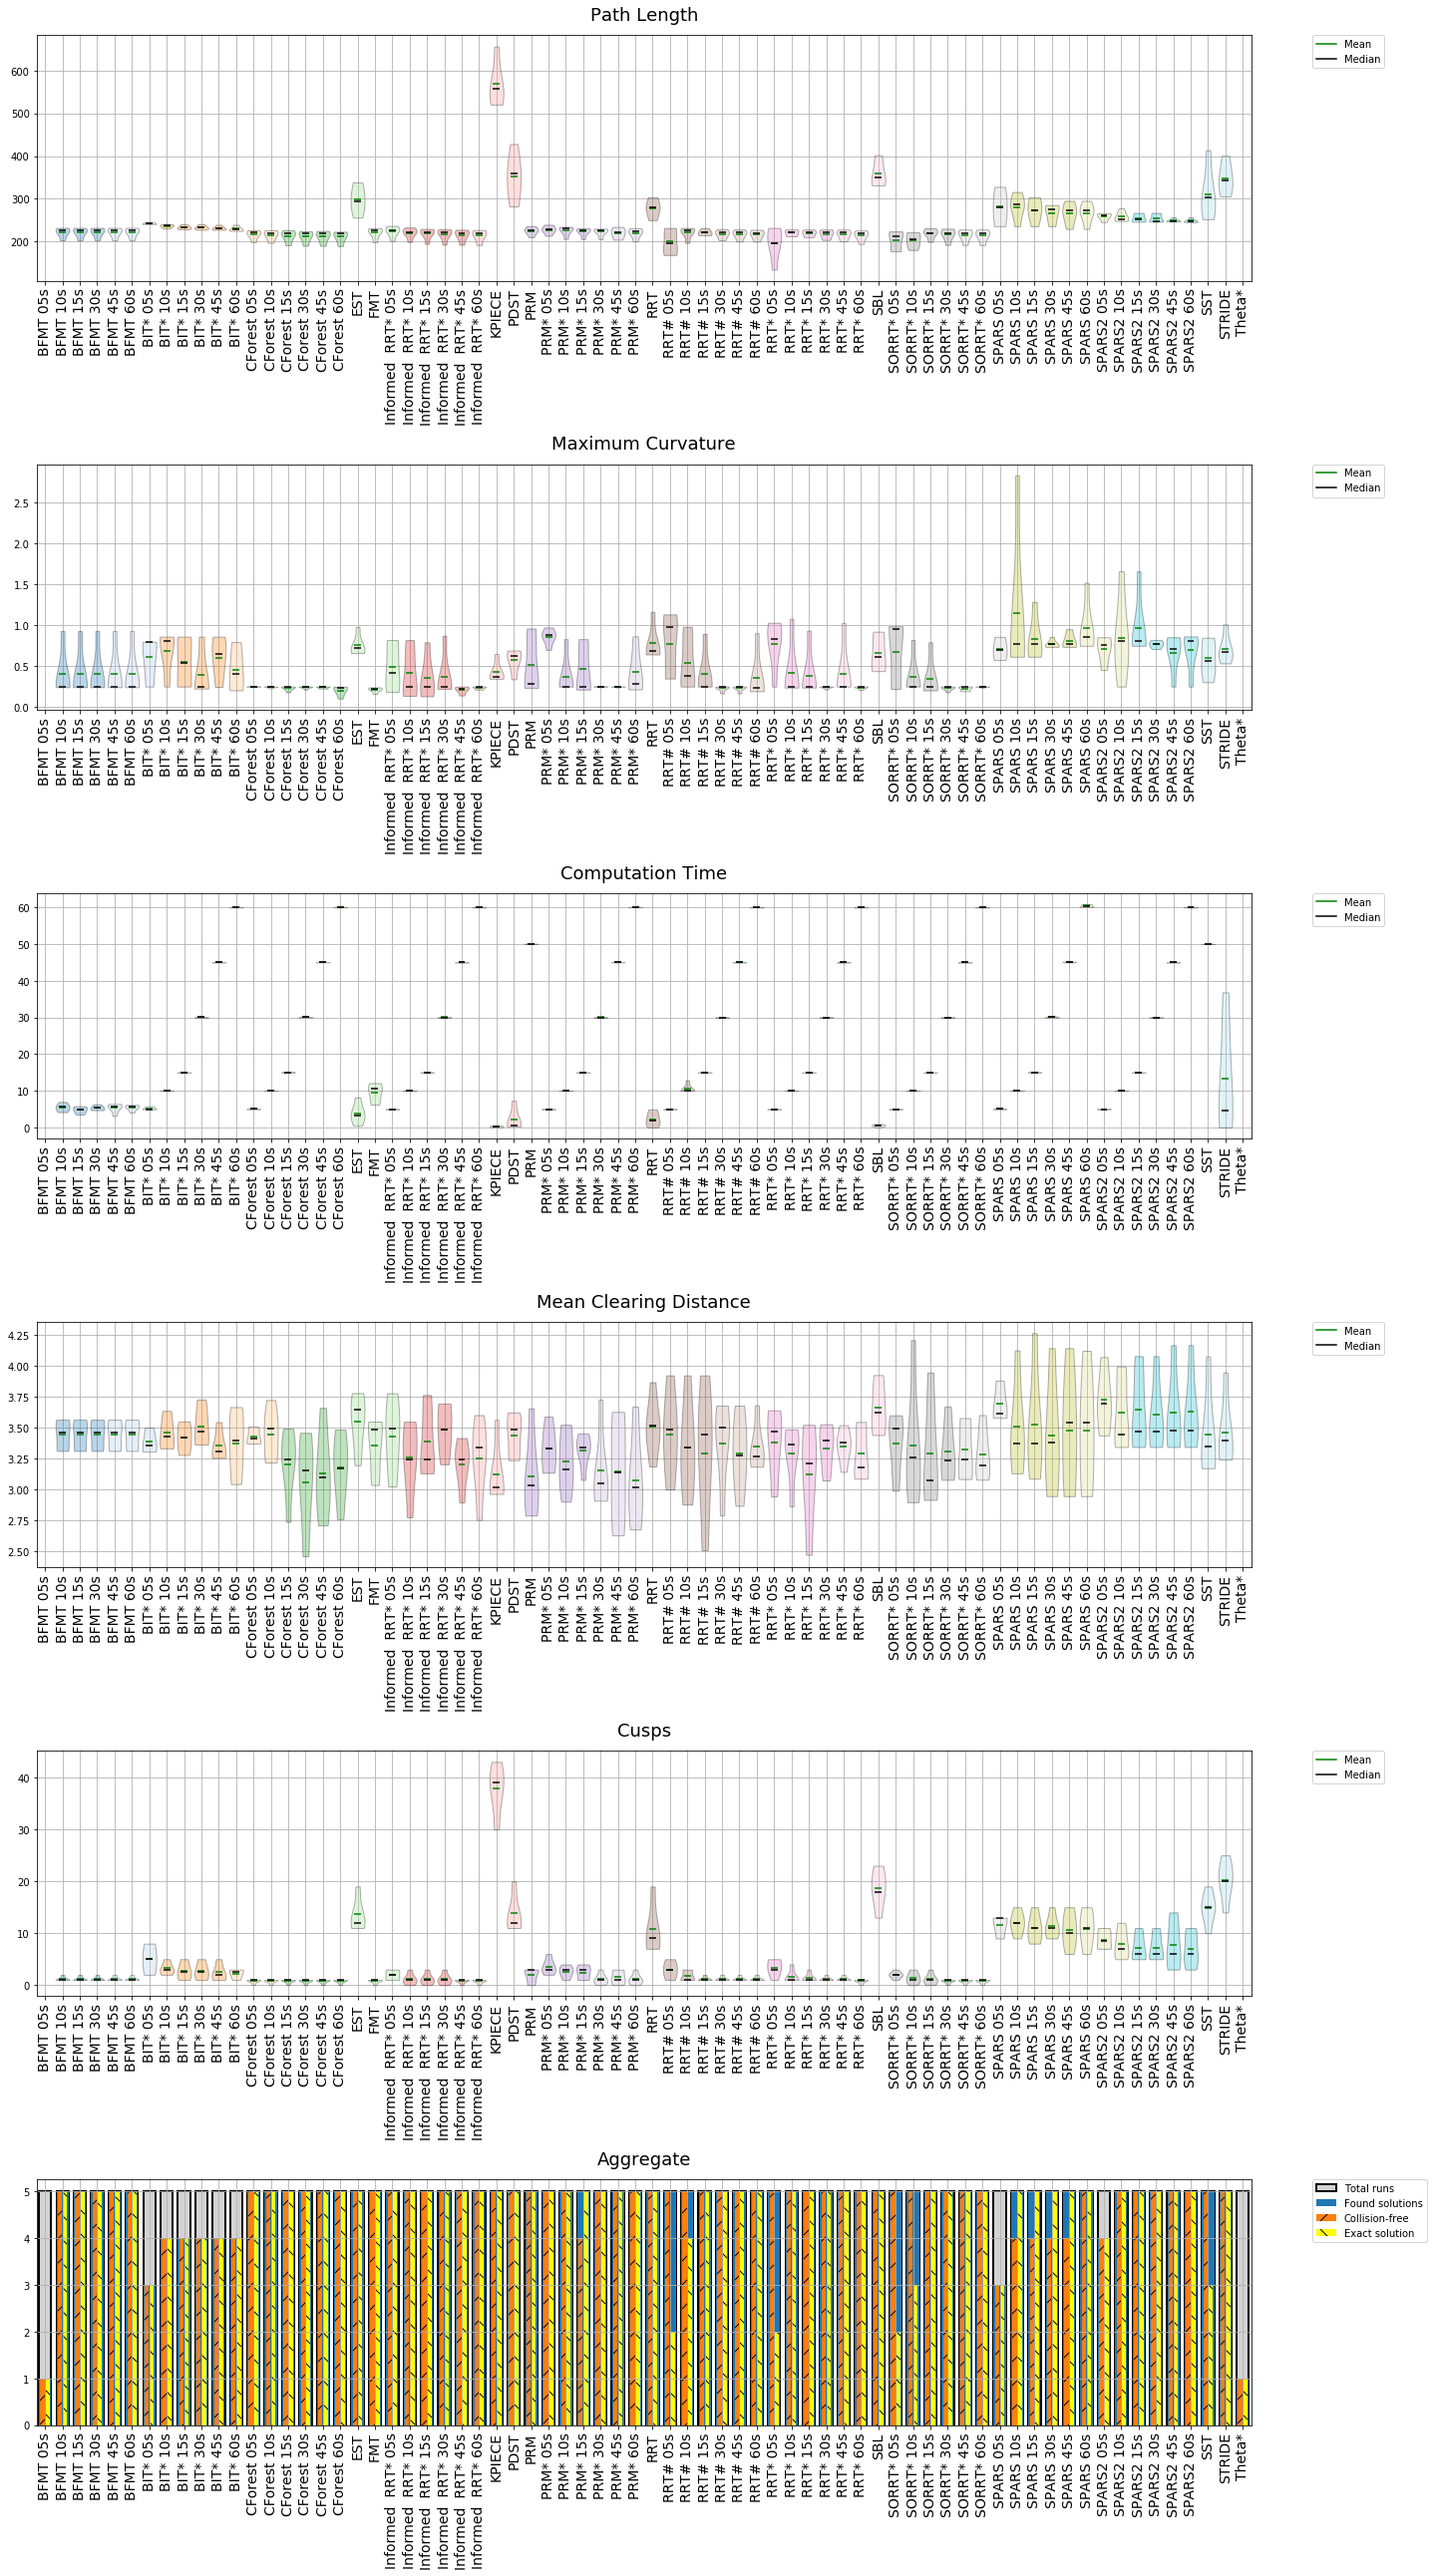

In [158]:
from plot_stats import plot_planner_stats
plot_planner_stats("sampling_vs_anytime.json", fig_width=20, max_plots_per_line=1, save_file='sampling_vs_anytime_planners.pdf')

Visualizing sampling_vs_anytime.json...
Saved sampling_vs_anytime_smoothers.pdf.


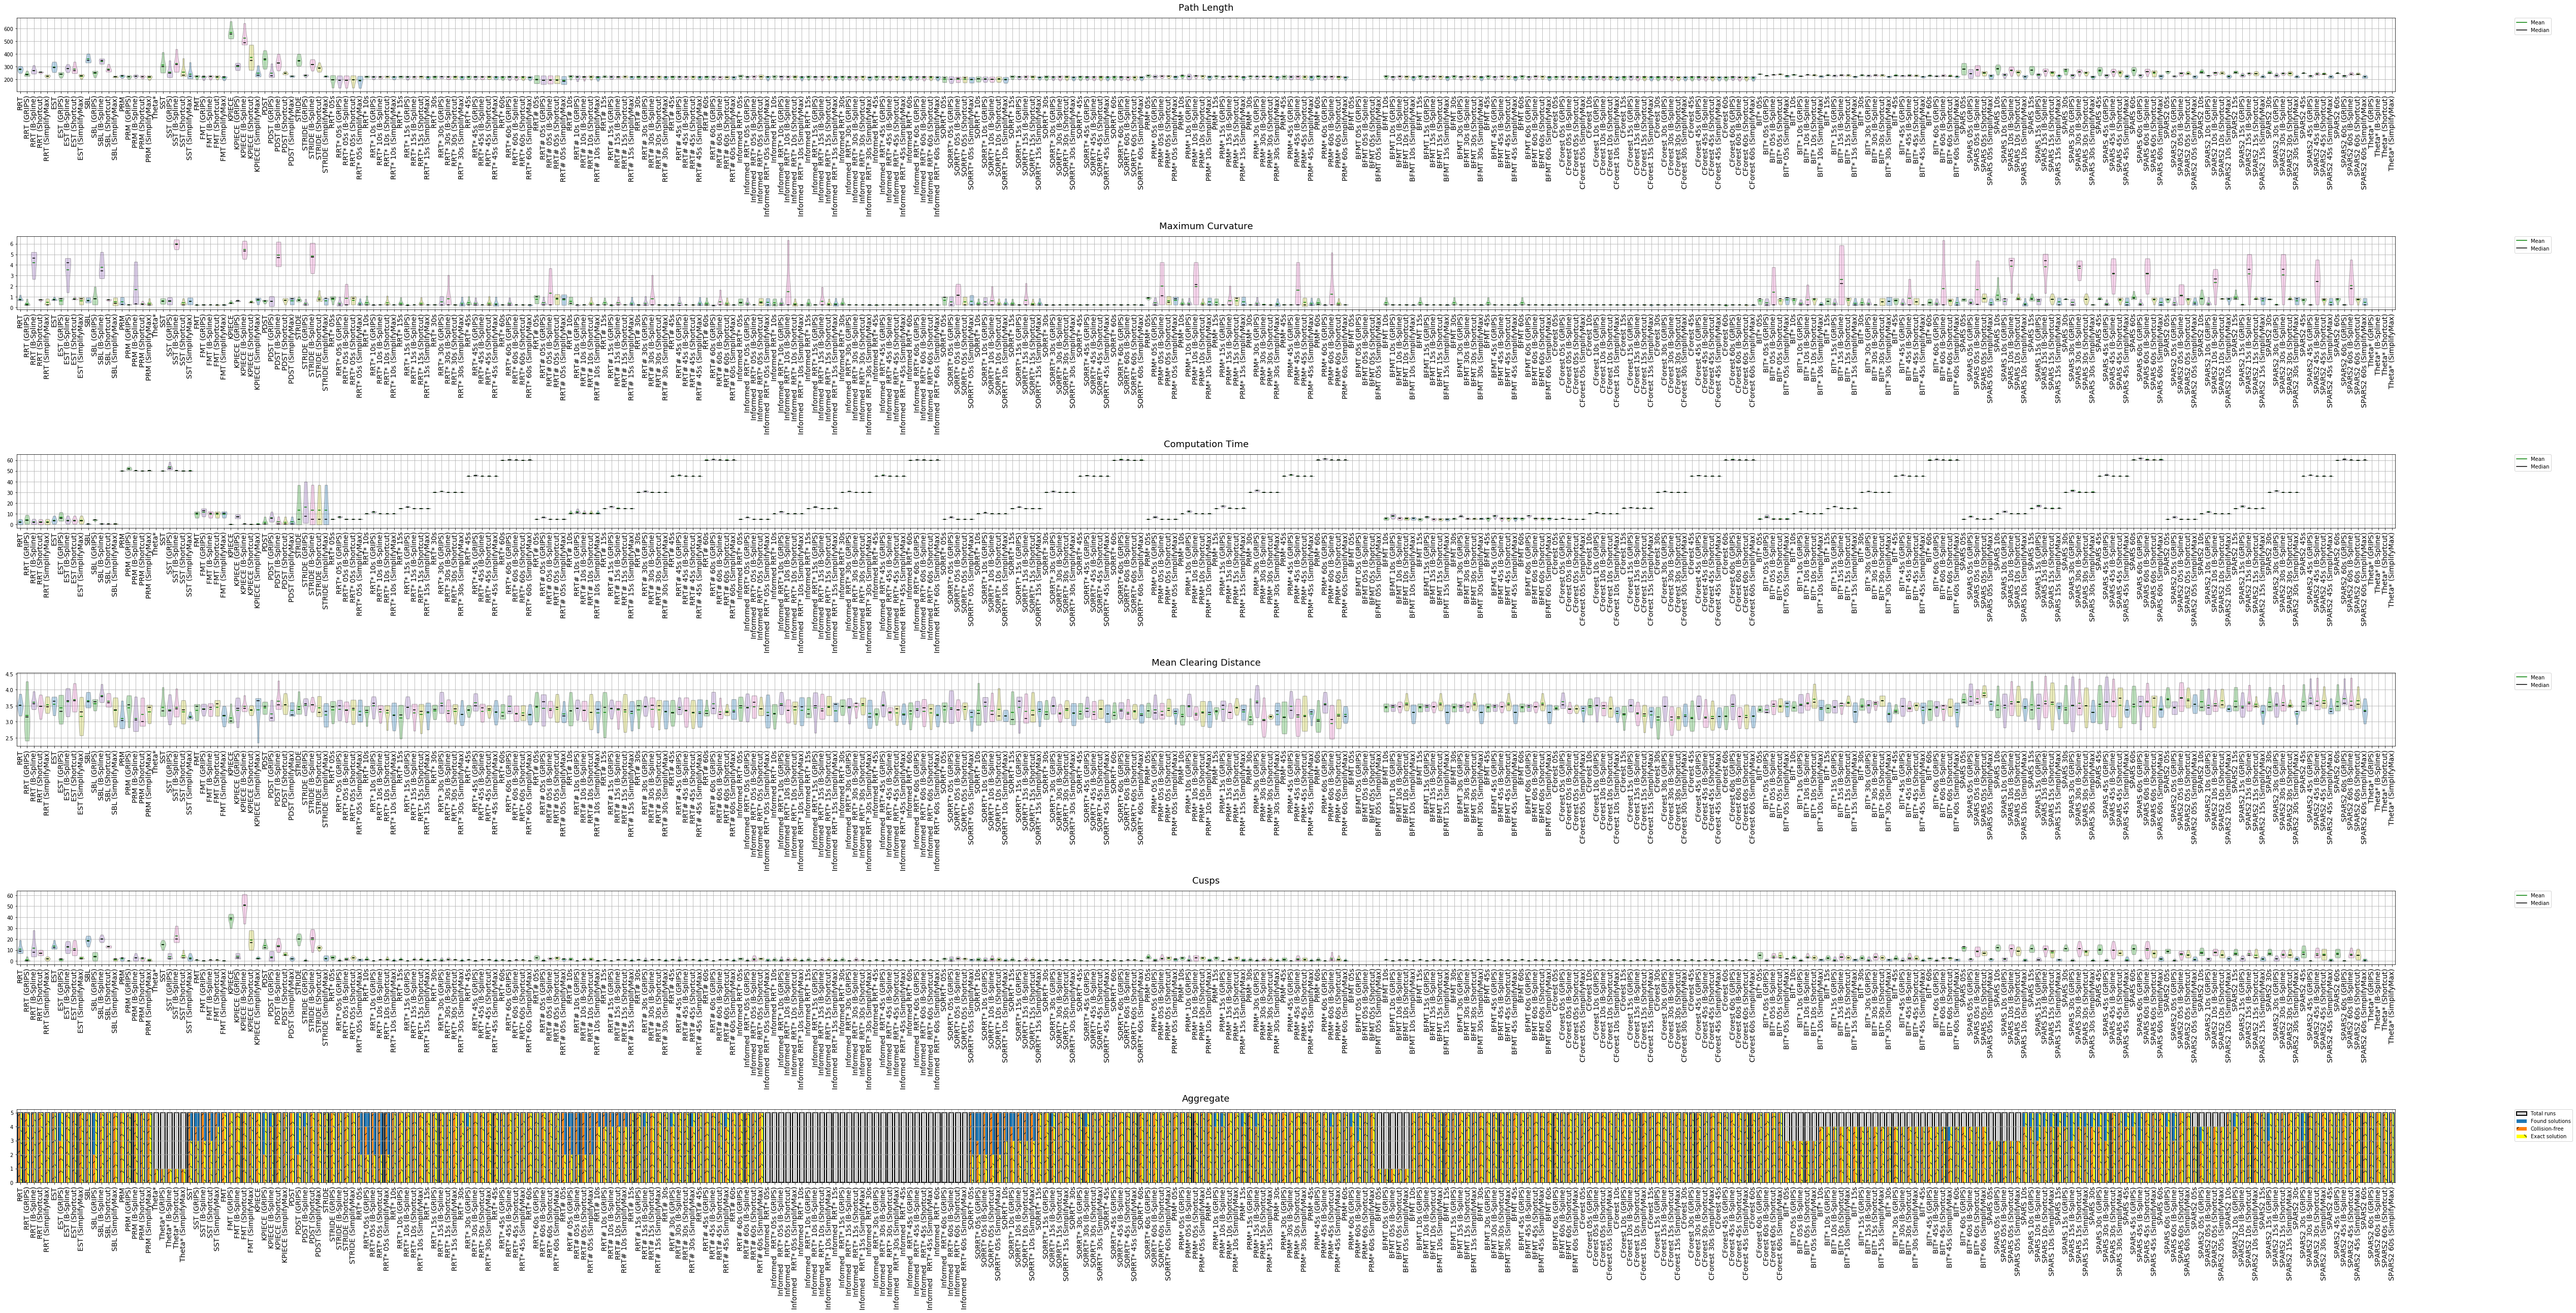

In [159]:
from plot_stats import plot_smoother_stats
plot_smoother_stats("sampling_vs_anytime.json", fig_width=70, max_plots_per_line=1, save_file='sampling_vs_anytime_smoothers.pdf', num_colors=5)

In [198]:
from definitions import *
from utils import *
from color import *
import os
import json

def plot_metric(metric: str, run_id: int, ignore_planners: [str] = [], title: str = None, fig_width=10, fig_height=8, **kwargs):
    plt.figure(figsize=(fig_width, fig_height))
    if title is None:
        plt.title("%s (Run #%i)" % (stat_names[metric], run_id), fontsize=18)
    else:
        plt.title(title, fontsize=18)
    plt.grid()
    plt.xlabel("Computation Time [s]", fontsize=14)

    i = 0

    for planner in sampling_planners:
        if i >= len(pool.benchmarks):
            break
        elif not os.path.exists(pool.benchmarks[i].results_filename):
            i += 1
            continue
        if planner in ignore_planners:
            i += 1
            continue
        result = json.load(open(pool.benchmarks[i].results_filename, 'r'))
        i += 1
        times = []
        values = []
        if len(result["runs"]) <= run_id:
            continue
        run = result["runs"][run_id]
        if not planner_internal_names[planner] in run["plans"]:
            print("Planner %s could not be found!" % planner)
            continue
        plan = run["plans"][planner_internal_names[planner]]
        if not plan:
            print("Plan for %s is empty" % planner)
            continue
        time = plan["stats"]["planning_time"]
        value = plan["stats"][metric]
        if value is None:
            print("No stats exist for planner %s." % planner)
            continue
        times.append(time)
        values.append(value)
        if "smoothing" not in plan or not plan["smoothing"]:
            print("No smoothers for %s!" % planner)
        else:
            for smoother, marker in zip(plan["smoothing"].keys(), ["o", "X", "P", "v"]):
                smoothing = plan["smoothing"][smoother]
                smooth_time = smoothing["stats"]["planning_time"] + smoothing["time"]
                smooth_value = smoothing["stats"][metric]
                plt.plot(times + [smooth_time],
                         values + [smooth_value],
                         '*-', color=get_color(i, num_colors=20))
                plt.plot([smooth_time],
                         [smooth_value],
                         marker, color=get_color(i, num_colors=20), markersize=10,
                         label="%s (%s)" % (planner_names[planner], smoother_names[smoother]))


    for planner in anytime_planners:
        times = []
        values = []
        for max_time in [5, 10, 15, 30, 45, 60]:
            if i >= len(pool.benchmarks):
                break
            elif not os.path.exists(pool.benchmarks[i].results_filename):
                i += 1
                continue
            if planner in ignore_planners:
                i += 1
                continue
            result = json.load(open(pool.benchmarks[i].results_filename, 'r'))
            i += 1

            if len(result["runs"]) <= run_id:
                continue
            run = result["runs"][run_id]
            if not planner_internal_names[planner] in run["plans"]:
                print("Planner %s could not be found!" % planner)
                continue
            plan = run["plans"][planner_internal_names[planner]]
            if not plan:
                print("Plan for %s is empty" % planner)
                continue
            time = plan["stats"]["planning_time"]
            value = plan["stats"][metric]

            times.append(time)
            values.append(value)
        if planner not in ignore_planners:
            plt.plot(times, values, '.-', label=planner_names[planner])

    show_legend(**kwargs)
    plt.tight_layout()
    plt.savefig("sam_vs_any_%s_%i.pdf" % (metric, run_id), bbox_inches="tight")
    return plt

No stats exist for planner theta_star.


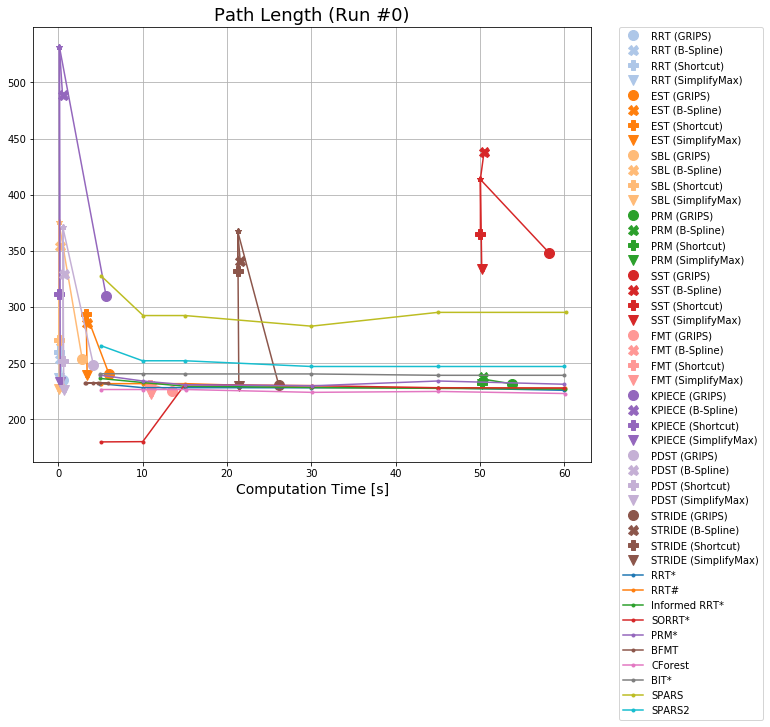

No stats exist for planner theta_star.


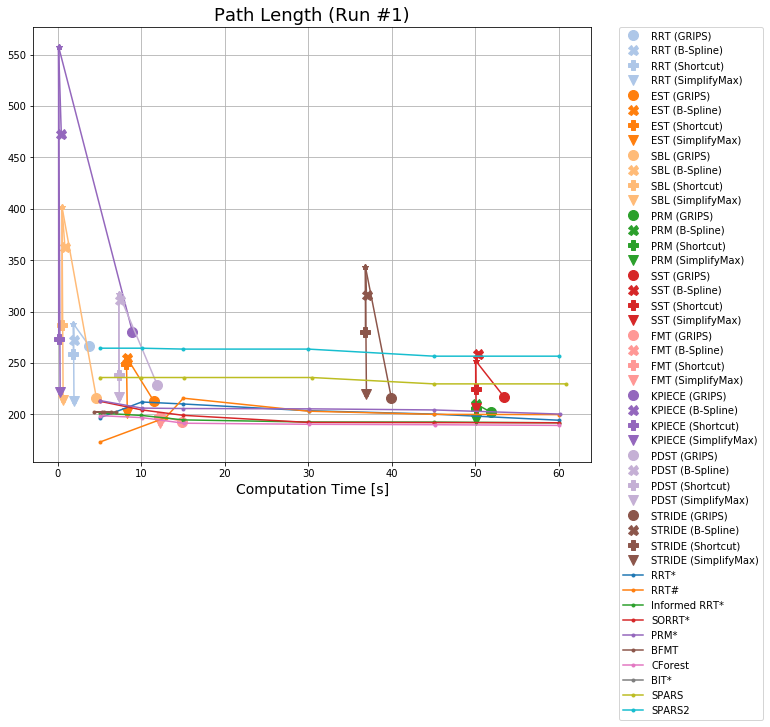

No stats exist for planner theta_star.


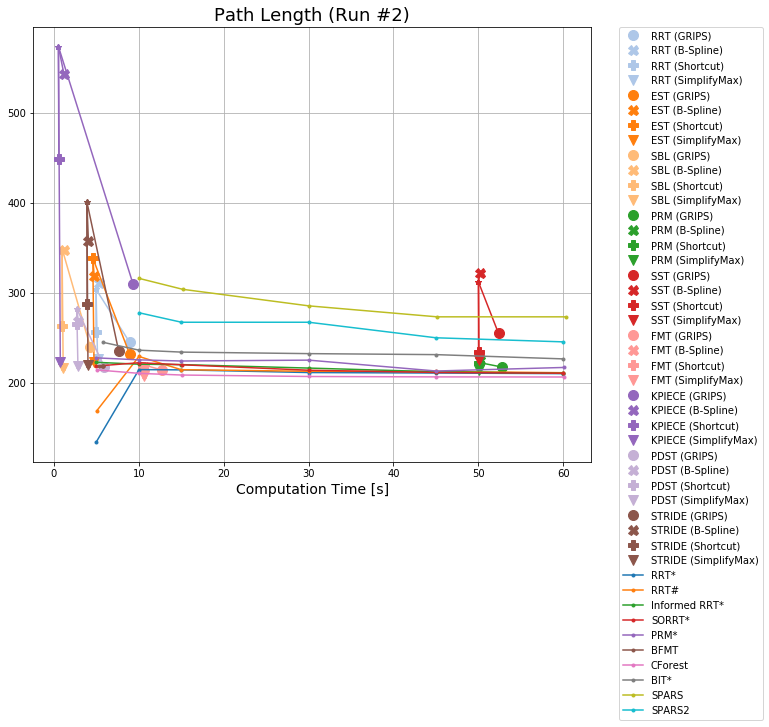

No stats exist for planner theta_star.


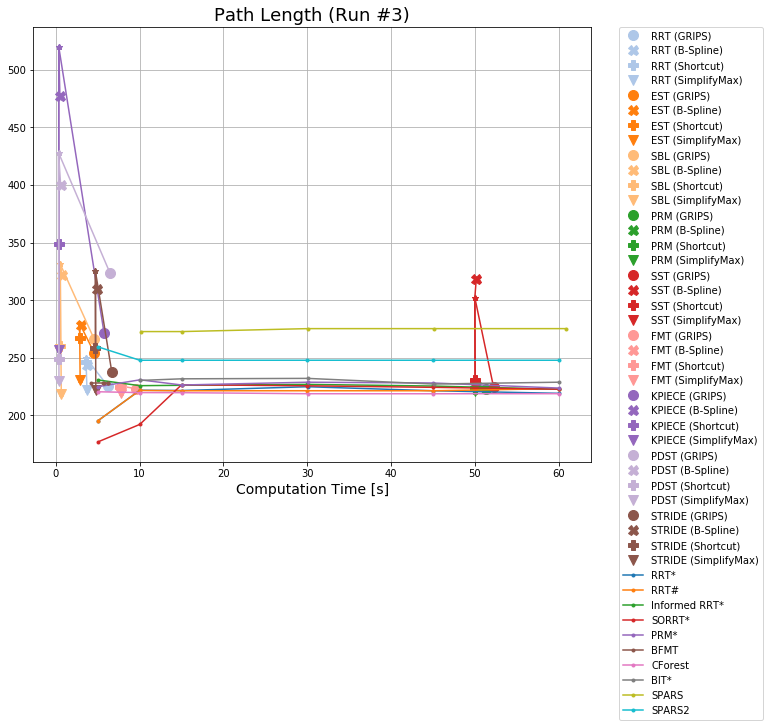

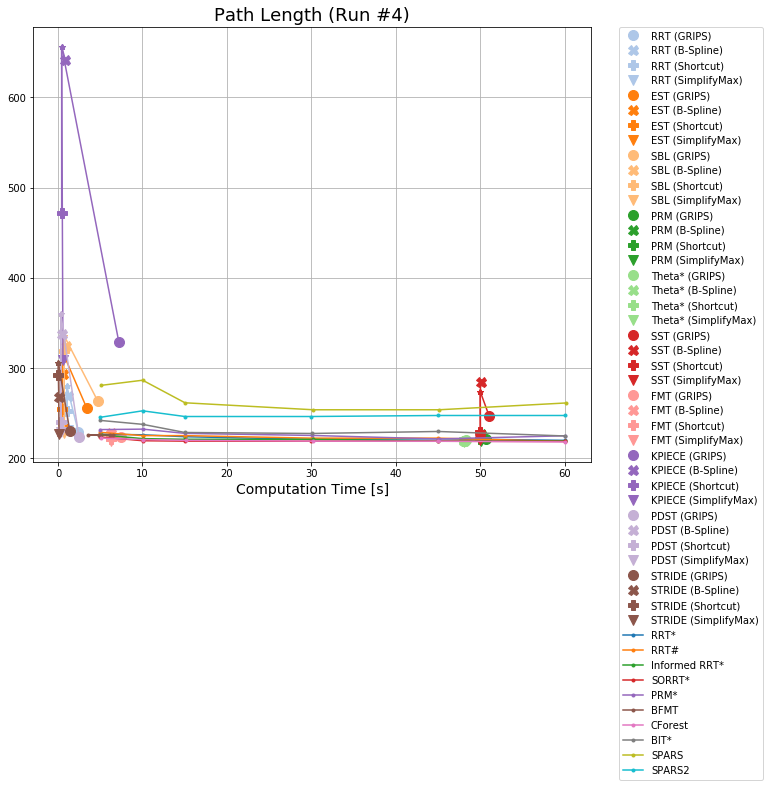

No stats exist for planner theta_star.


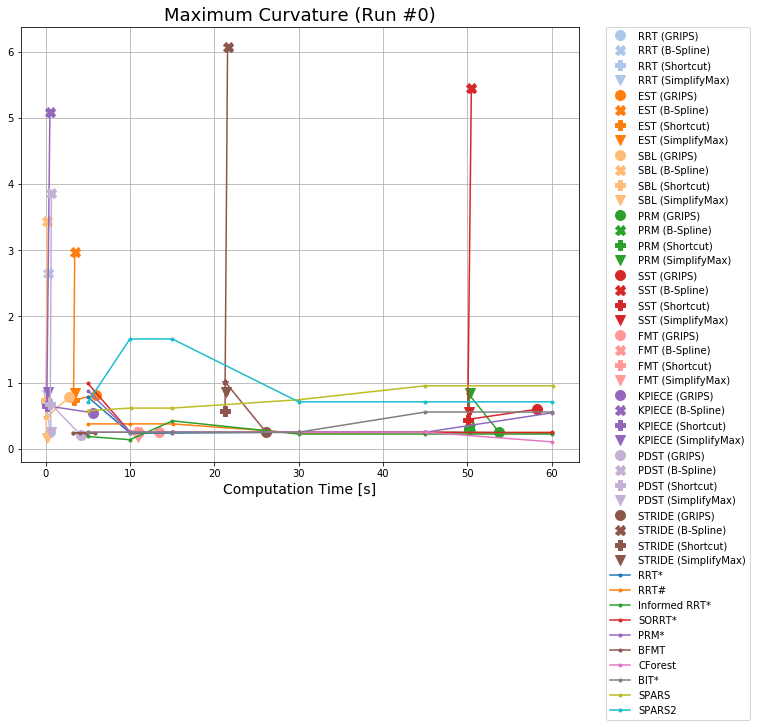

No stats exist for planner theta_star.


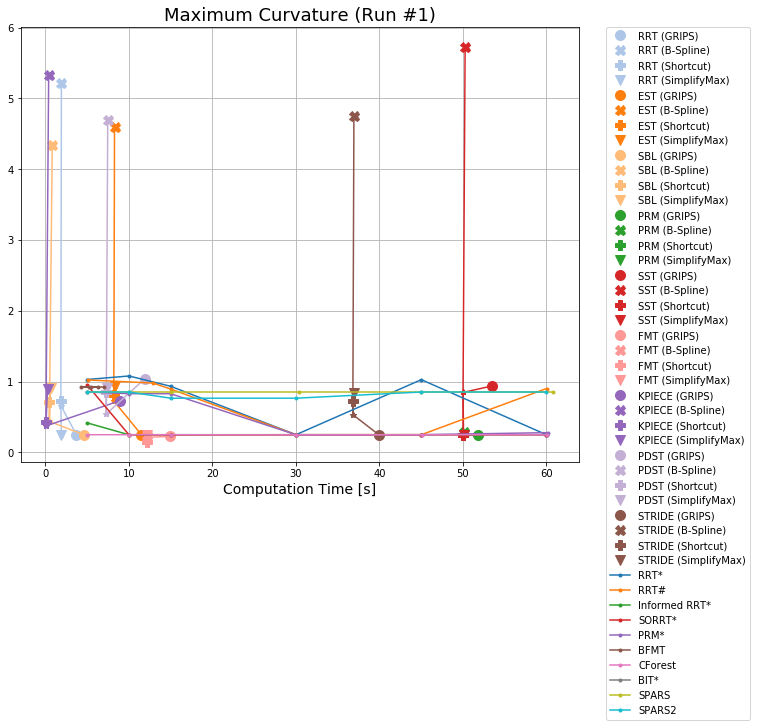

No stats exist for planner theta_star.


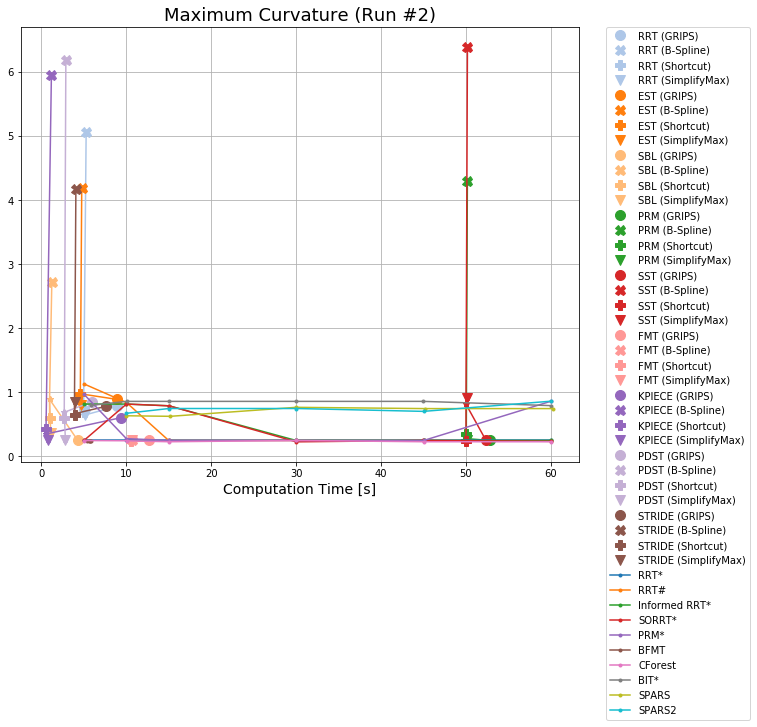

No stats exist for planner theta_star.


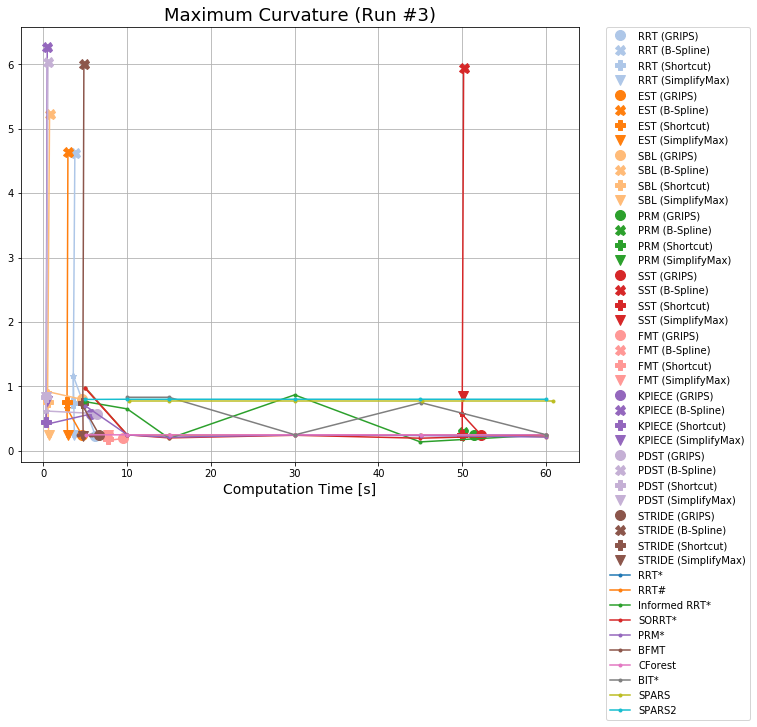

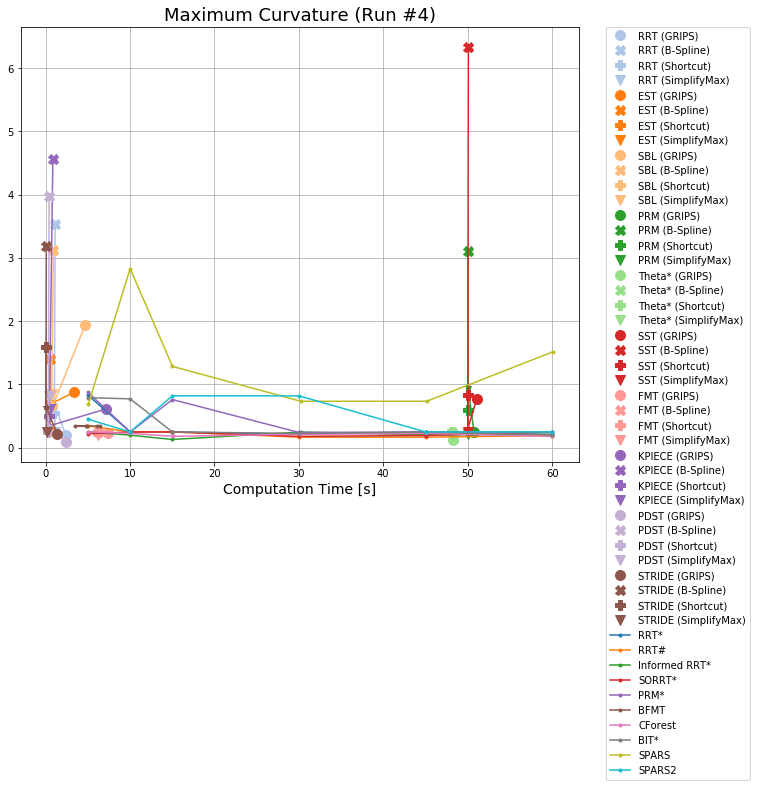

No stats exist for planner theta_star.


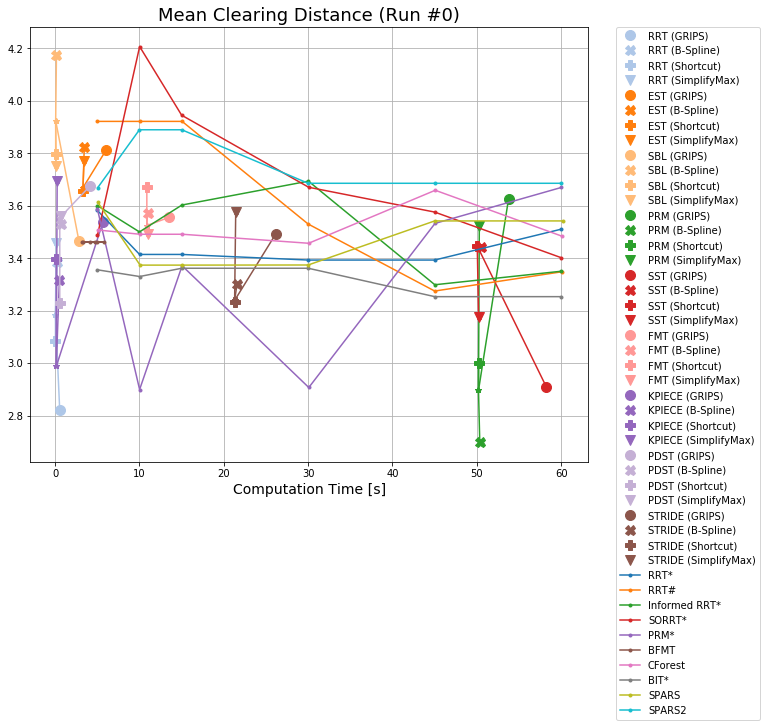

No stats exist for planner theta_star.


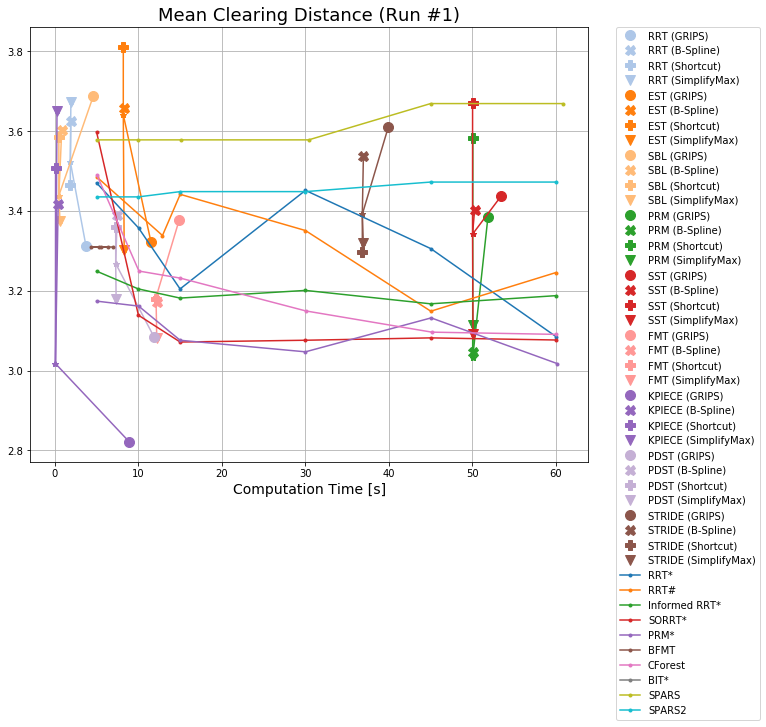

No stats exist for planner theta_star.


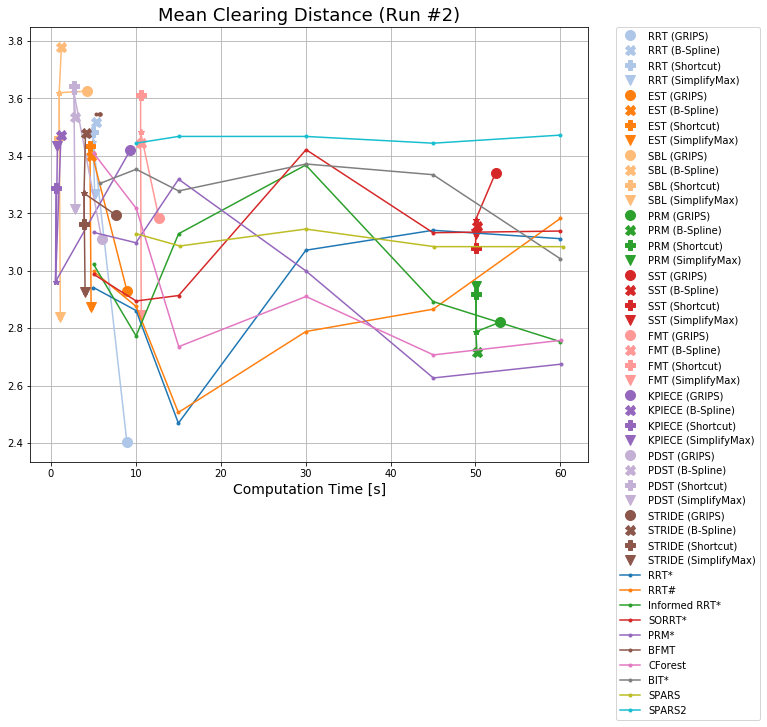

No stats exist for planner theta_star.


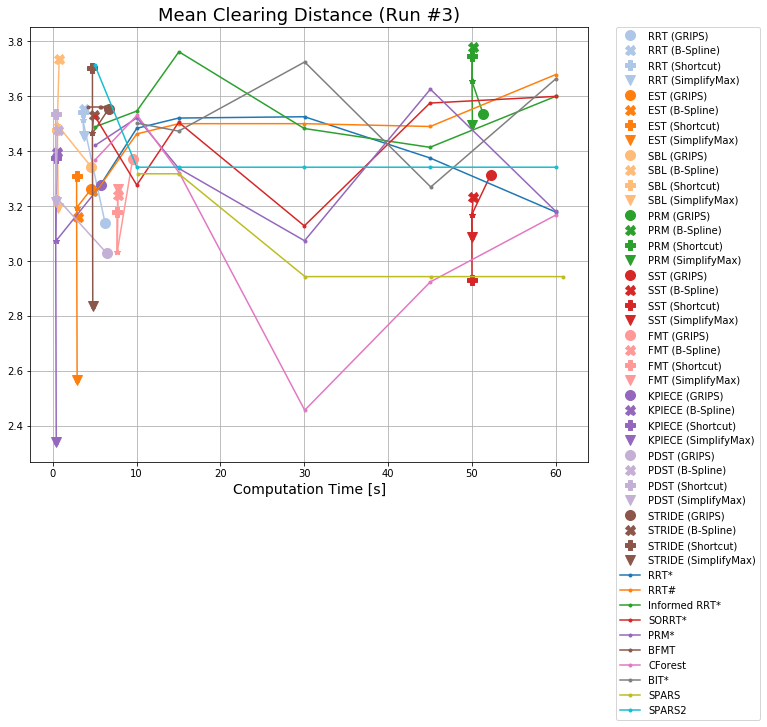

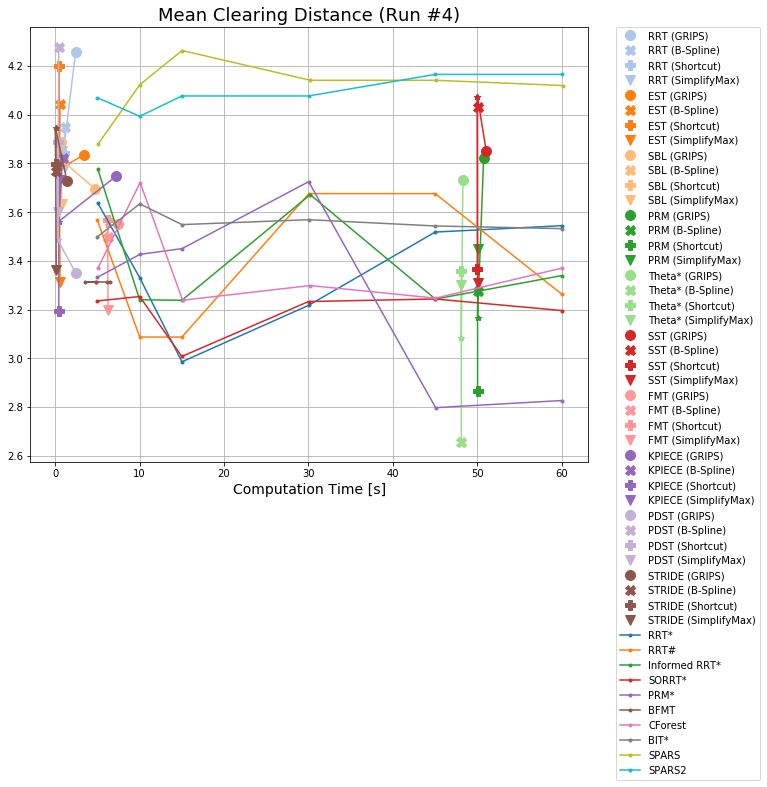

In [163]:
for metric in ["path_length", "curvature", "mean_clearing_distance"]:
    for run_id in range(5):
        plot_metric(metric, run_id)

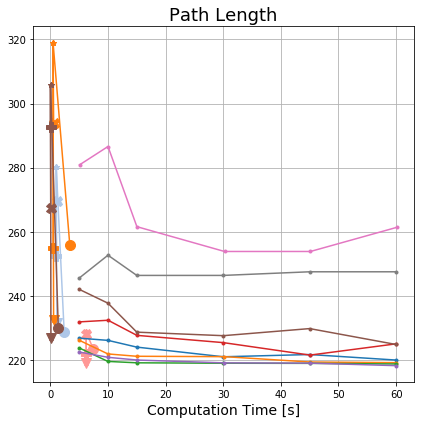

In [205]:
ignore_planners = ["kpiece", "pdst", "sbl", "prm", "sst", "rrt_sharp", "bfmt", "theta_star"]
plot_metric("path_length", 4, ignore_planners, title="Path Length", show_legend=False, fig_width=6, fig_height=6)
plt.tight_layout()
plt.savefig("sam_vs_any_path_length.pdf");

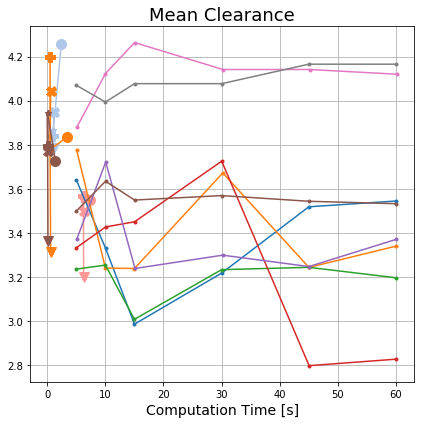

In [206]:
ignore_planners = ["kpiece", "pdst", "sbl", "prm", "sst", "rrt_sharp", "bfmt", "theta_star"]
plot_metric("mean_clearing_distance", 4, ignore_planners, title="Mean Clearance", show_legend=False, fig_width=6, fig_height=6)
plt.tight_layout()
plt.savefig("sam_vs_any_clearance.pdf");

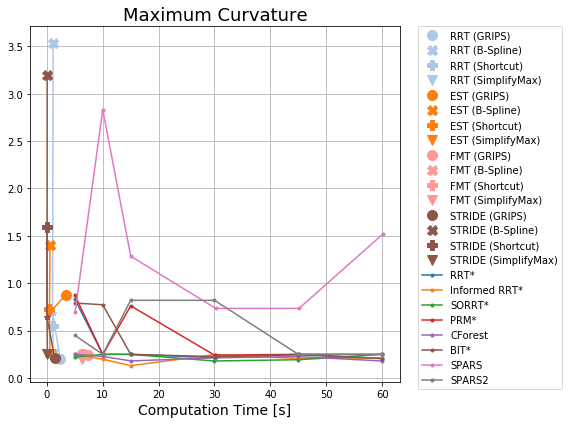

In [203]:
ignore_planners = ["kpiece", "pdst", "sbl", "prm", "sst", "rrt_sharp", "bfmt", "theta_star"]
plot_metric("curvature", 4, ignore_planners, title="Maximum Curvature", show_legend=True, fig_width=8, fig_height=6)
plt.tight_layout()
plt.savefig("sam_vs_any_curvature.pdf");

Visualizing sam_vs_any/sampling_sbl_results.json
Saved sam_vs_any_est_traj.pdf.


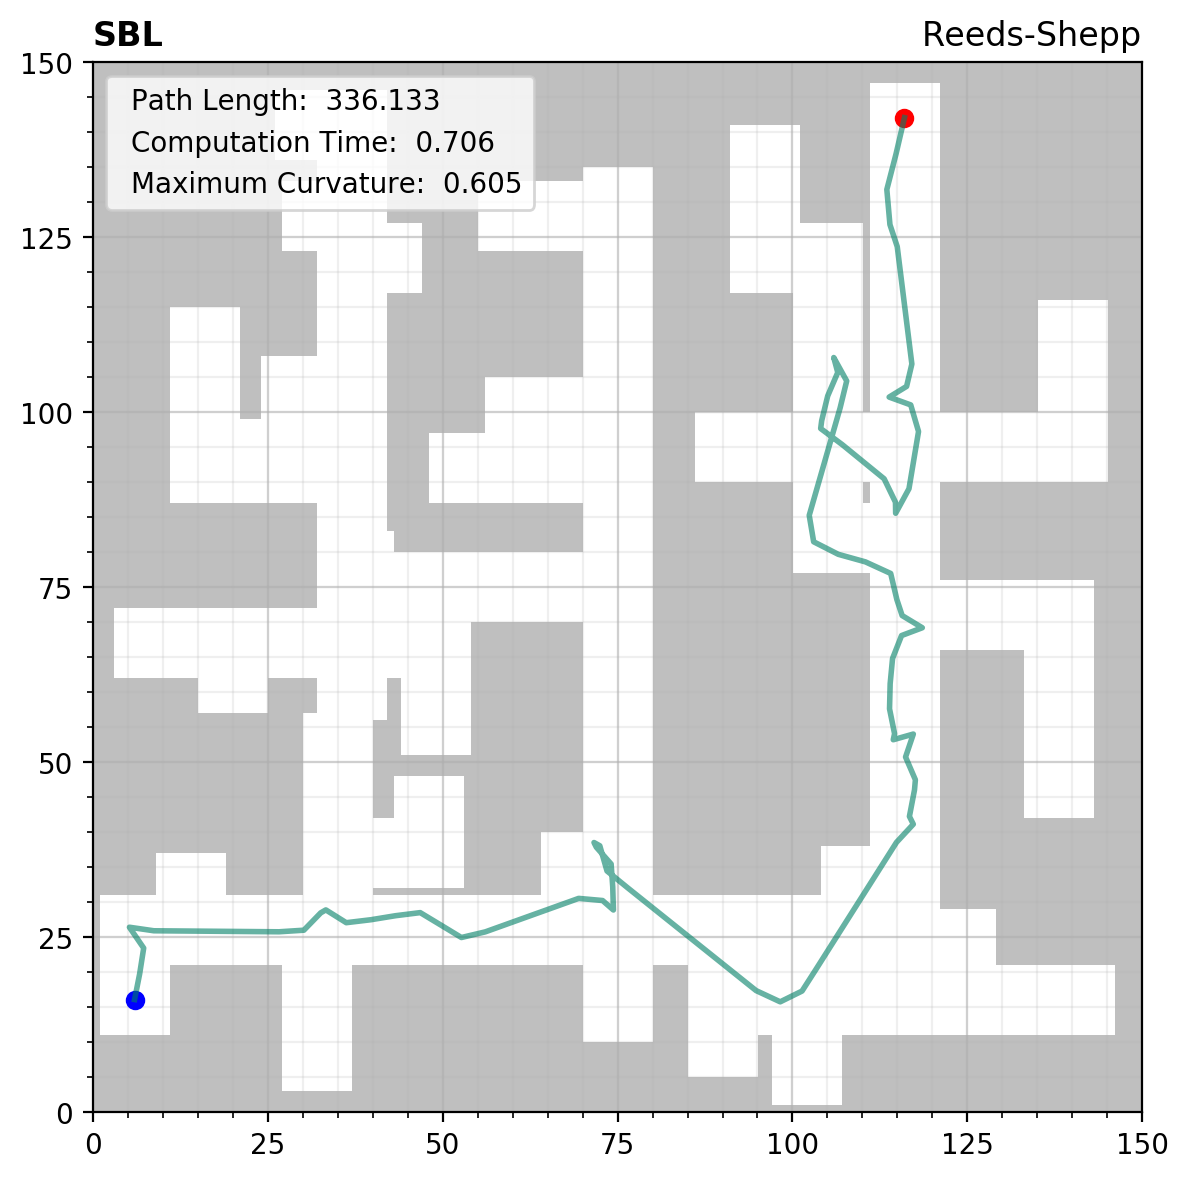

Visualizing sam_vs_any/sampling_sbl_results.json
Ignoring the following smoother(s): GRIPS, B-Spline, Shortcut
Saved sam_vs_any_est_simplifymax_traj.pdf.


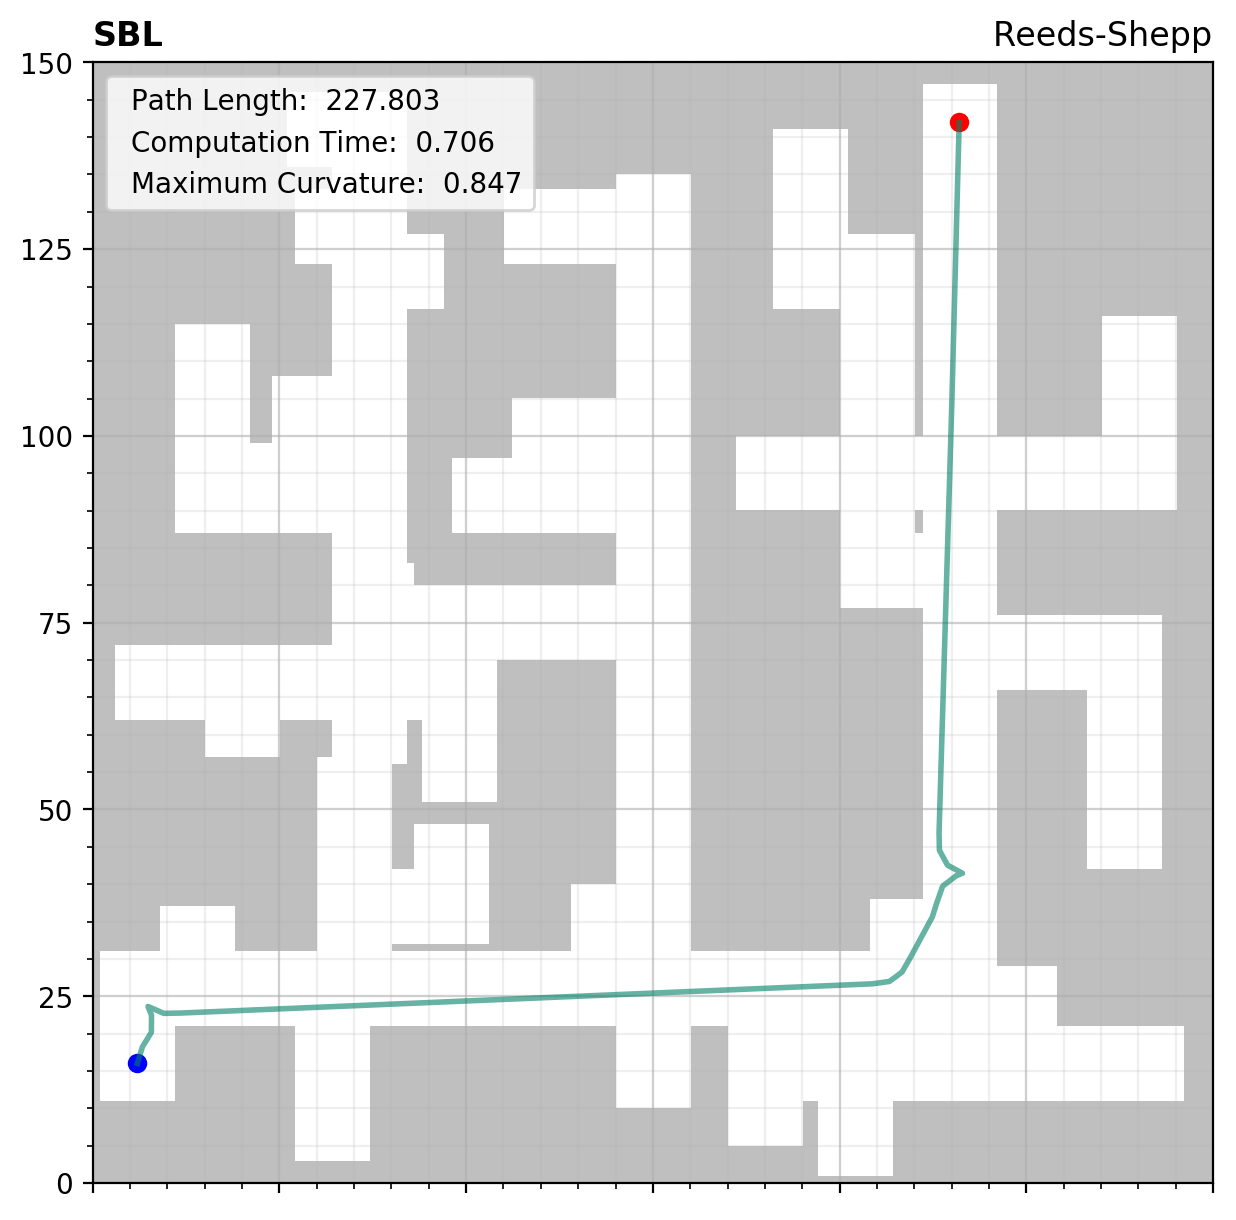

Visualizing sam_vs_any/anytime_sorrt_star_5_results.json
Saved sam_vs_any_informed_rrt_star_traj.pdf.


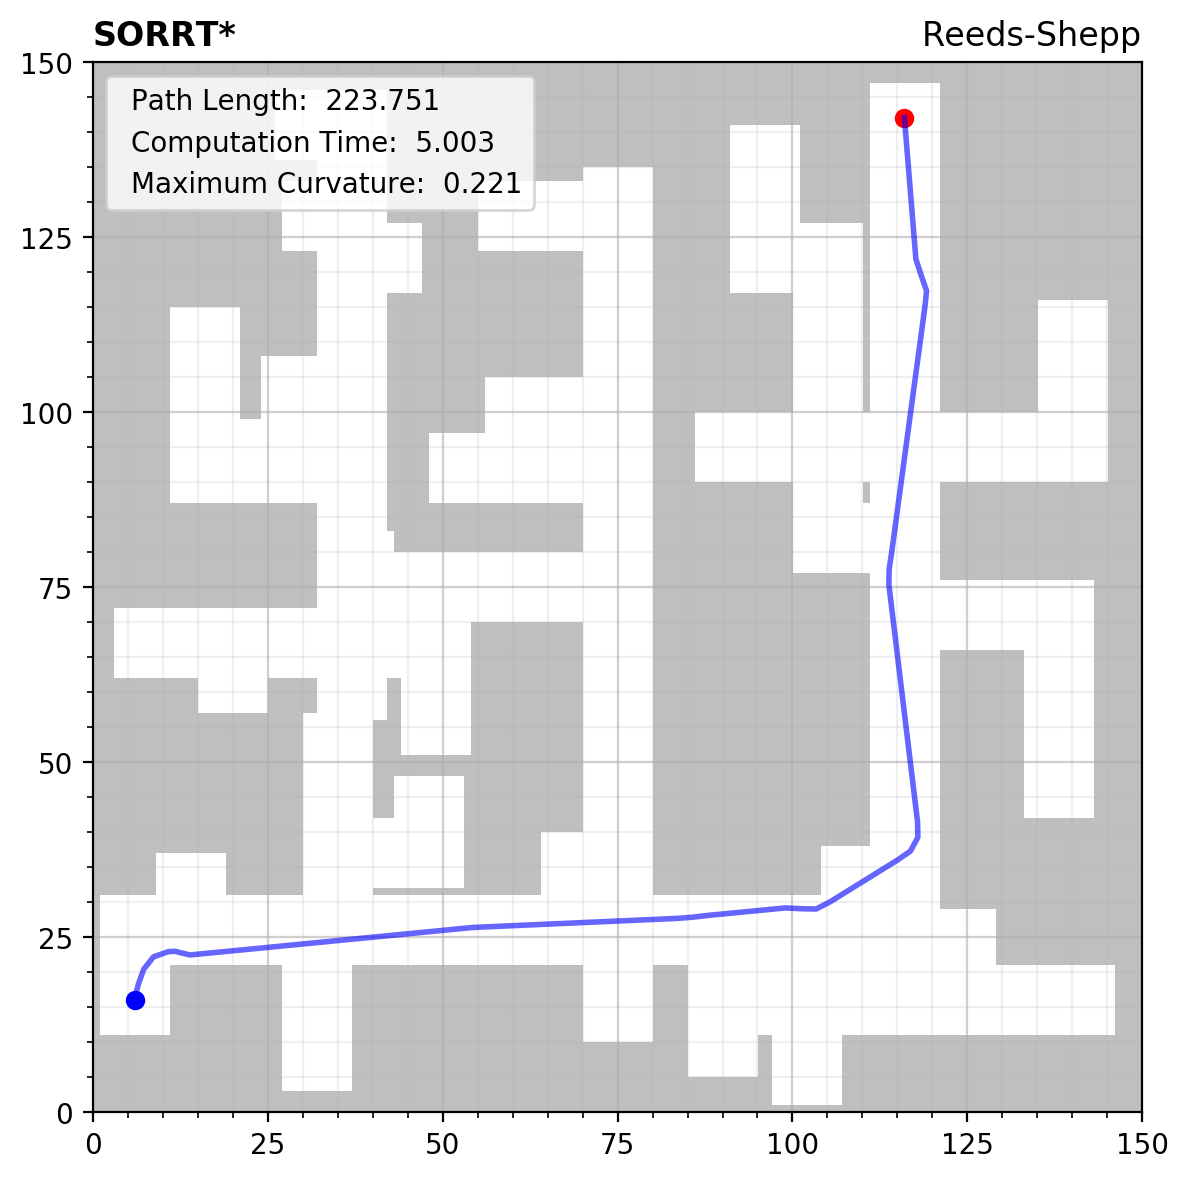

In [224]:
from trajectory import visualize_grid
i = 0

for planner in sampling_planners:
    i += 1
    if planner != "est":
        continue
    visualize_grid(pool.benchmarks[i].results_filename, run_id='4',
                   plot_every_nth_polygon=0, show_legend=False,
                   color_map_name='summer',
                   save_file="sam_vs_any_%s_traj.pdf" % planner)
    visualize_grid(pool.benchmarks[i].results_filename, run_id='4',
                   plot_every_nth_polygon=0, show_legend=False,
                   show_only_smoother=True, show_smoother=True,
                   ignore_smoothers="grips,bspline,shortcut",
                   color_map_name='summer',
                   save_file="sam_vs_any_%s_simplifymax_traj.pdf" % planner)

for planner in anytime_planners:
    times = []
    values = []
    for max_time in [5, 10, 15, 30, 45, 60]:        
        i += 1        
        if planner == "informed_rrt_star" and max_time == 60:
            visualize_grid(pool.benchmarks[i].results_filename, run_id='4',
                           plot_every_nth_polygon=0, show_legend=False,
                           color_map_name='winter',
                           save_file="sam_vs_any_%s_traj.pdf" % planner)